In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score, recall_score, confusion_matrix, precision_score


In [2]:
data = pd.DataFrame()
data= pd.read_csv('../../dataset/BasicFeatures/Merged/DarknessLocationConvoActivityLockMerged.csv')

PHQ9Classified = pd.DataFrame()
PHQ9Classified = pd.read_csv('../../dataset/PHQ9/PHQ9PreClassified.csv')
data = pd.merge(data, PHQ9Classified, on='userId')
data = data.drop(columns=['userId','WeekId'])




In [3]:
X = data.drop(['PHQ9'], axis=1)
y = data['PHQ9']

scaler = MinMaxScaler()
XNorm = scaler.fit_transform(X)


In [4]:
# CNN Model
X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.2, random_state=42)


X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.1)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

y_pred_prob = model.predict(X_test_reshaped)

y_pred = (y_pred_prob > 0.5).astype(int)

balanced_acc = balanced_accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)

print(f'Balanced Accuracy: {balanced_acc}, Sensitivity: {recall}, Specificity: {specificity}, Precision: {precision}')


Epoch 1/50


2024-04-24 19:18:37.306721: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - 0s 19ms/step - loss: 0.6645 - accuracy: 0.6167 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 0.6206 - accuracy: 0.6722 - val_loss: 0.6353 - val_accuracy: 0.6667
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 0.6243 - accuracy: 0.6722 - val_loss: 0.6335 - val_accuracy: 0.6667
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 0.6214 - accuracy: 0.6722 - val_loss: 0.6292 - val_accuracy: 0.6667
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.6722 - val_loss: 0.6267 - val_accuracy: 0.6667
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 0.6049 - accuracy: 0.6722 - val_loss: 0.6241 - val_accuracy: 0.6667
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 0.6038 - accuracy: 0.6722 - val_loss: 0.6259 - val_accuracy: 0.6667
Epoch 8/50
6/6 [============================

In [5]:
# Oversampling
oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(XNorm, y)

In [6]:
# oversampled CNN
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


modelOversampled = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


modelOversampled.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

modelOversampled.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.1)

loss, accuracy = modelOversampled.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

y_pred_prob = modelOversampled.predict(X_test_reshaped)

y_pred = (y_pred_prob > 0.5).astype(int)

balanced_acc = balanced_accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

precision = precision_score(y_test, y_pred)

print(f'Balanced Accuracy: {balanced_acc}, Sensitivity: {recall}, Specificity: {specificity}, Precision: {precision}')

Epoch 1/50
8/8 [==============================] - 0s 13ms/step - loss: 0.6904 - accuracy: 0.5142 - val_loss: 0.6865 - val_accuracy: 0.5000
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.5385 - val_loss: 0.6798 - val_accuracy: 0.5000
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.5466 - val_loss: 0.6718 - val_accuracy: 0.5714
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.5870 - val_loss: 0.6614 - val_accuracy: 0.6071
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6344 - accuracy: 0.6802 - val_loss: 0.6483 - val_accuracy: 0.7857
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6210 - accuracy: 0.6842 - val_loss: 0.6290 - val_accuracy: 0.6786
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6041 - accuracy: 0.6883 - val_loss: 0.6104 - val_accuracy: 0.7500
Epoch 8/50
8/8 [=================

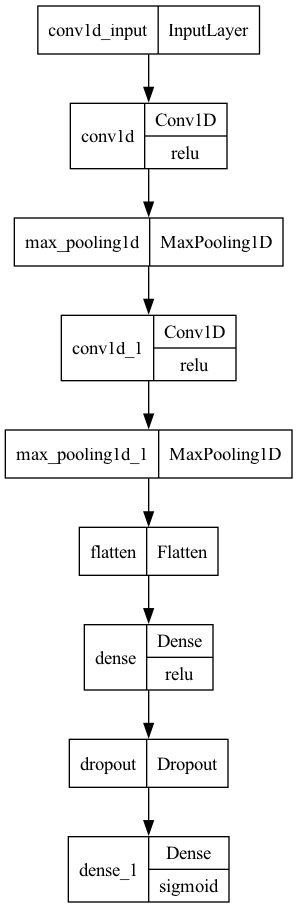

In [8]:
from keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='cnn_model.png', show_shapes=False, show_layer_names=True,show_layer_activations=True)
